# Data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/merged.csv")
null_counts = df.isnull().sum()
print("Null value summary:")
print(null_counts[null_counts > 0] if null_counts.any() else "No nulls found")
df.dropna(inplace=True)

Null value summary:
text    2
dtype: int64


Ratio:
origin
Dataset    0.192887
vihsd      0.209065
victsd     0.144942
dtype: float64


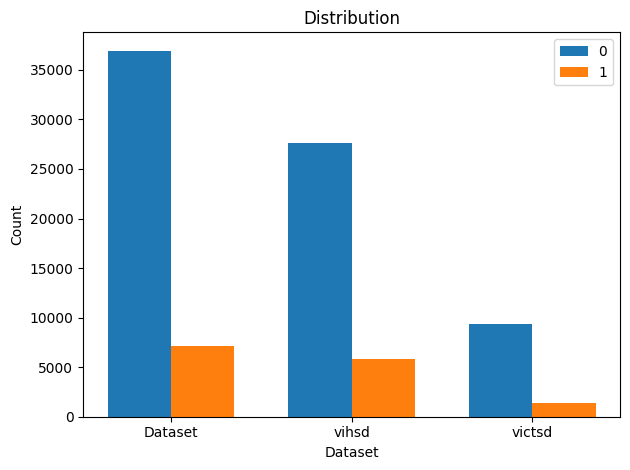

In [18]:
counts_df = df.groupby(["new_label", "origin"]).size().unstack(fill_value=0)
counts_df["Dataset"] = df.groupby("new_label").size()
counts_df = counts_df[["Dataset", "vihsd", "victsd"]]

groups = ["Dataset", "vihsd", "victsd"]
counts = [counts_df.loc[0, groups], counts_df.loc[1, groups]]

rate = counts[1] / counts[0]
print("Ratio:")
print(rate)

x = range(len(groups))
bar_width = 0.35

plt.bar(x, counts[0], width=bar_width, label="0")
plt.bar([i + bar_width for i in x], counts[1], width=bar_width, label="1")

plt.xlabel("Dataset")
plt.ylabel("Count")
plt.title("Distribution")
plt.xticks([i + bar_width / 2 for i in x], groups)
plt.legend()
plt.tight_layout()
plt.show()
